<a href="https://colab.research.google.com/github/FredLongo/MLDL/blob/main/CNN_Model_to_Trainipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fred Longo, Modeling after notebook:

https://www.kaggle.com/code/shuvojitdas/emotion-detection-using-cnn/notebook




###This is Admin in setting up data.

In [ ]:
#!mkdir ./drive/MyDrive/Databases/Dataset_Project_2/train

mkdir: cannot create directory ‘./drive/MyDrive/Databases/Dataset_Project_2/train’: No such file or directory


In [ ]:
# ll ./drive/MyDrive/Databases/Dataset_Project_1/validation


total 12
drwx------ 2 root 4096 Mar 13 20:49 'Class 1 Touch'/
drwx------ 2 root 4096 Mar 13 20:49 'Class 2 No hands'/
drwx------ 2 root 4096 Mar 13 20:50 'Class 3 No Touch w Hands'/


In [ ]:
#cp -r ./drive/MyDrive/Databases/Dataset_Project_1/Subject_2 ./drive/MyDrive/Databases/Dataset_Project_1/validation

In [ ]:
#cp -r ./drive/MyDrive/Databases/Dataset_Project_1/Subject_1 ./drive/MyDrive/Databases/Dataset_Project_1/train

### This is where the Program Starts

Training Should be seperete from testing.  

In [ ]:
#!pip install

In [12]:
!pip install tensorflow

In [13]:

#Import Librarys

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [14]:


from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import rmsprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [3]:
ls drive/MyDrive/Databases/Dataset_Project_1/

 Subject_1/    Subject_12/  'Subject_14 (1)'/   Subject_17/   Subject_3/   Subject_6/   Subject_9/
 Subject_10/   Subject_13/   Subject_15/        Subject_18/   Subject_4/   Subject_7/
 Subject_11/   Subject_14/   Subject_16/        Subject_2/    Subject_5/   Subject_8/


In [15]:
#picture_size = 48
picture_size = 224
folder_path = "drive/MyDrive/Databases/Dataset_Project_1/"
#folder_path = "../input/face-expression-recognition-dataset/images/"

###Validate Data is threre

In [ ]:
#expression = 'happy'
Subject_path = 'Subject_1'
Class_path = 'Class 1 Touch'


plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
#    img = load_img(folder_path+"train/"+expression+"/"+
    img = load_img(folder_path + Subject_path + "/" + Class_path + "/" +
                   os.listdir(folder_path + Subject_path + "/" + Class_path)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

Images should show here...

### Set Up Data groups for Training Testing and Validation.

In [16]:
#batch_size  = 128
batch_size  = 50

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

#TODO   Upload all the files into on folder for each catagory and
# code randomly split the selections themselves.
# For Testing algorithom I'm just using subject 1 as training and subject_2 as validation

#sample code follows:
'''
from keras.preprocessing.image import ImageDataGenerator

# Define your ImageDataGenerator with a validation split
datagen = ImageDataGenerator(validation_split=0.2) # for example, 20% for validation

# Setup the training generator
train_generator = datagen.flow_from_directory(
    directory=folder_path, # The directory where your data is located
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', # Set as training data
    shuffle=True)

# Setup the validation generator
validation_generator = datagen.flow_from_directory(
    directory=folder_path, # The directory where your data is located
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', # Set as validation data
    shuffle=True)
'''



train_set = datagen_train.flow_from_directory(folder_path+"Subject_1",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"Subject_1",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 550 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


### Build Model

In [17]:
no_of_classes = 3

model = Sequential()

#1st CNN layer
#model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (224,224,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)

In [18]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      640       
                                                                 
 batch_normalization_6 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)    

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-21-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9382 

11/11 [==============================] - 722s 67s/step - loss: 0.1482 - accuracy: 0.9382 - val_loss: 204.8519 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 8.8500e-04 - accuracy: 1.0000 

11/11 [==============================] - 746s 70s/step - loss: 8.8500e-04 - accuracy: 1.0000 - val_loss: 155.7408 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 2.9822e-04 - accuracy: 1.0000 

11/11 [==============================] - 752s 70s/step - loss: 2.9822e-04 - accuracy: 1.0000 - val_loss: 93.4355 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 4/20
11/11 [==============================] - ETA: 0s - loss: 1.4335e-04 - accuracy: 1.0000 

11/11 [==============================] - 755s 71s/step - loss: 1.4335e-04 - accuracy: 1.0000 - val_loss: 54.1409 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 5/20
11/11 [==============================] - ETA: 0s - loss: 1.4547e-04 - accuracy: 1.0000 

11/11 [==============================] - 739s 69s/step - loss: 1.4547e-04 - accuracy: 1.0000 - val_loss: 30.9536 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 6/20
11/11 [==============================] - ETA: 0s - loss: 1.5647e-04 - accuracy: 1.0000 

11/11 [==============================] - 720s 67s/step - loss: 1.5647e-04 - accuracy: 1.0000 - val_loss: 16.9222 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 7/20
11/11 [==============================] - ETA: 0s - loss: 1.5346e-04 - accuracy: 1.0000 

11/11 [==============================] - 716s 67s/step - loss: 1.5346e-04 - accuracy: 1.0000 - val_loss: 8.3777 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 8/20
11/11 [==============================] - ETA: 0s - loss: 2.2659e-04 - accuracy: 1.0000 

11/11 [==============================] - 711s 67s/step - loss: 2.2659e-04 - accuracy: 1.0000 - val_loss: 3.1192 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 9/20
11/11 [==============================] - ETA: 0s - loss: 2.0298e-04 - accuracy: 1.0000 

11/11 [==============================] - 638s 59s/step - loss: 2.0298e-04 - accuracy: 1.0000 - val_loss: 0.6392 - val_accuracy: 0.6018 - lr: 0.0010
Epoch 10/20
11/11 [==============================] - ETA: 0s - loss: 1.7543e-04 - accuracy: 1.0000 

11/11 [==============================] - 662s 62s/step - loss: 1.7543e-04 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 11/20
11/11 [==============================] - ETA: 0s - loss: 1.1320e-04 - accuracy: 1.0000 

11/11 [==============================] - 708s 66s/step - loss: 1.1320e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 12/20
11/11 [==============================] - ETA: 0s - loss: 9.0449e-05 - accuracy: 1.0000 

11/11 [==============================] - 708s 66s/step - loss: 9.0449e-05 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 13/20
11/11 [==============================] - ETA: 0s - loss: 1.4072e-04 - accuracy: 1.0000 

11/11 [==============================] - 698s 65s/step - loss: 1.4072e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 14/20
11/11 [==============================] - ETA: 0s - loss: 9.4373e-05 - accuracy: 1.0000 

11/11 [==============================] - 643s 60s/step - loss: 9.4373e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 15/20
11/11 [==============================] - ETA: 0s - loss: 9.4939e-05 - accuracy: 1.0000 Restoring model weights from the end of the best epoch: 12.



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
11/11 [==============================] - 623s 58s/step - loss: 9.4939e-05 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 15: early stopping


(None, 3)


AttributeError: 'DirectoryIterator' object has no attribute 'shape'

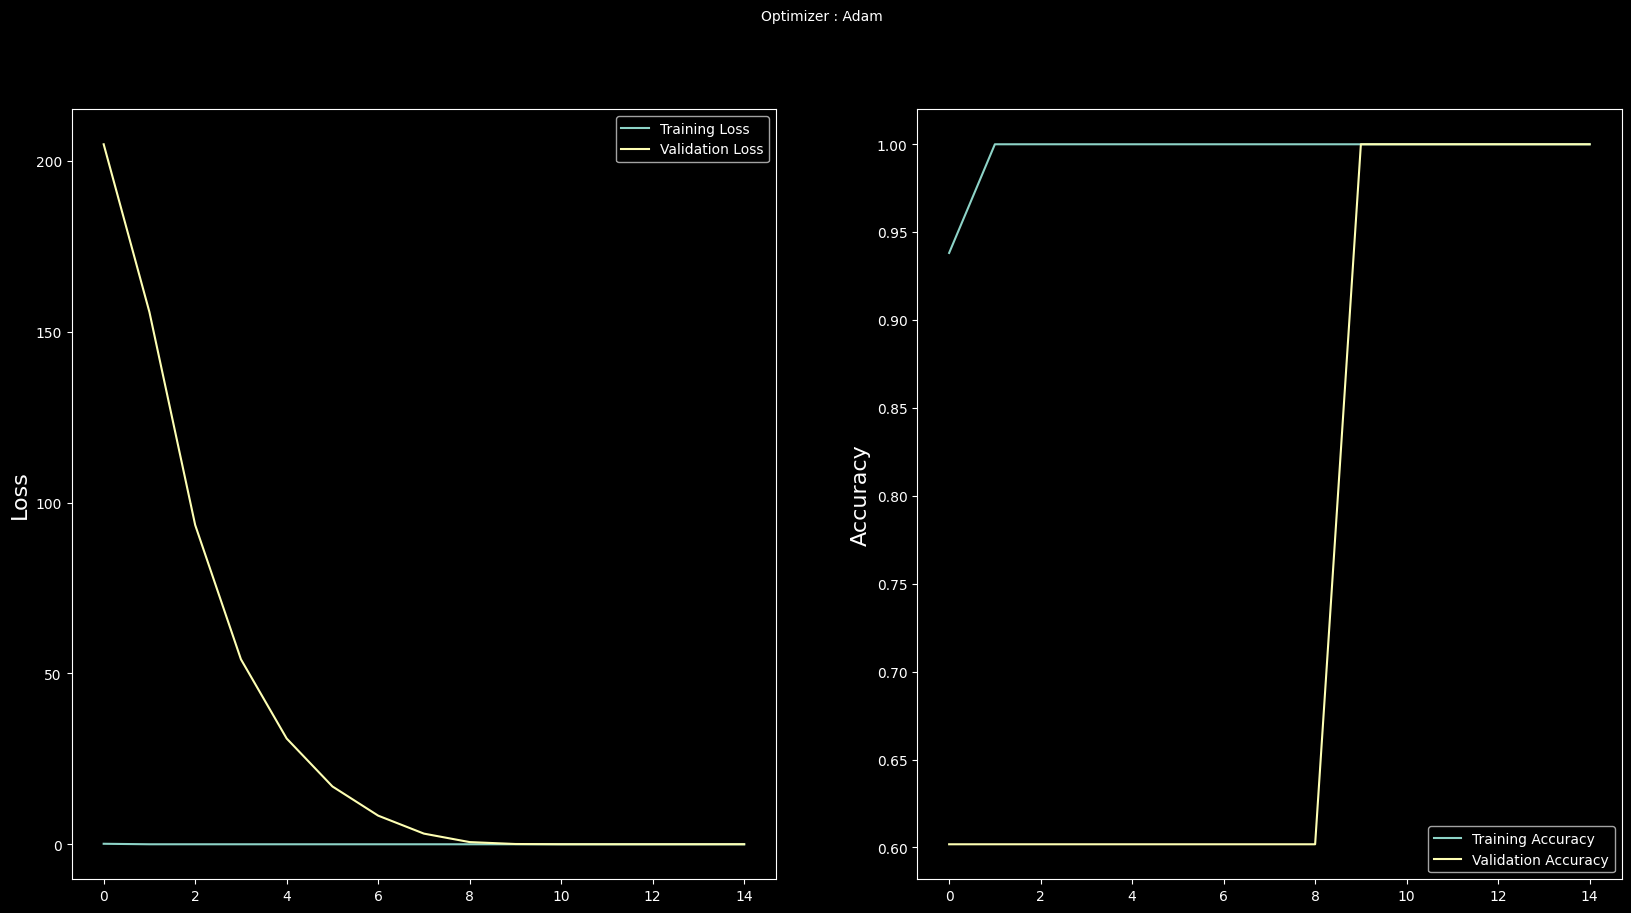

In [23]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()